# Implementation of face recognition using neural net 

In [136]:
%matplotlib inline

In [137]:
import cv2
import numpy as np
import os
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier


In [138]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics

#### Listing the path of all the images

In [139]:
DatasetPath = []
for i in os.listdir("orl_faces_small"):
    DatasetPath.append(os.path.join("orl_faces_small", i))

#### Reading each image and assigning respective labels

In [140]:
imageData = []
imageLabels = []

In [141]:
for i in DatasetPath:
    imgRead = io.imread(i,as_grey=True)
    imageData.append(imgRead)
    
    labelRead = int(os.path.split(i)[1].split("_")[0].replace("person", "")) - 1
    imageLabels.append(labelRead)

In [142]:
imageDataFin = imageData
c = np.array(imageData)

In [143]:
c.shape

(390, 112, 92)

#### Splitting Dataset into train and test

In [144]:
X_train, X_test, y_train, y_test = train_test_split(np.array(imageDataFin),np.array(imageLabels), train_size=0.7, random_state = 20)

In [145]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [146]:
X_train.shape

(273, 112, 92)

In [147]:
X_test.shape

(117, 112, 92)

In [148]:
nb_classes = 40
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [149]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#### Converting each 2d image into 1D vector

In [150]:
X_train = X_train.reshape(X_train.shape[0], 112*92)
X_test = X_test.reshape(X_test.shape[0], 112*92)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### Preprocessing -PCA

Plot of amount of variance explained vs pcs


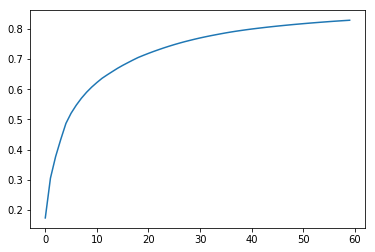

('Training PCA shape', (273, 60))
('Test PCA shape', (117, 60))
Eigen Faces


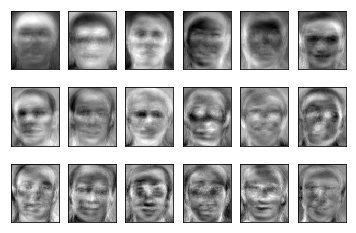

In [151]:
computed_pca = PCA(n_components = 60,whiten=True).fit(X_train)
XTr_pca = computed_pca.transform(X_train)

print("Plot of amount of variance explained vs pcs")
plt.plot(range(len(computed_pca.explained_variance_)),np.cumsum(computed_pca.explained_variance_ratio_))
plt.show()

XTs_pca = computed_pca.transform(X_test)
print("Training PCA shape",XTr_pca.shape)
print("Test PCA shape",XTs_pca.shape)


def plot_eigenfaces(images, h, w, rows=3, cols=6):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
plot_eigenfaces(computed_pca.components_,112,92)
print("Eigen Faces")

In [152]:
print("Original Training matrix shape", X_train.shape)
print("Original Testing matrix shape", X_test.shape)

('Original Training matrix shape', (273, 10304))
('Original Testing matrix shape', (117, 10304))


In [153]:
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=64, verbose=True, early_stopping=True).fit(XTr_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.61534886
Validation score: 0.214286
Iteration 2, loss = 2.91585783
Validation score: 0.428571
Iteration 3, loss = 2.32367782
Validation score: 0.607143
Iteration 4, loss = 1.78873364
Validation score: 0.714286
Iteration 5, loss = 1.32940466
Validation score: 0.750000
Iteration 6, loss = 0.95693896
Validation score: 0.785714
Iteration 7, loss = 0.67011449
Validation score: 0.857143
Iteration 8, loss = 0.46533024
Validation score: 0.857143
Iteration 9, loss = 0.32175598
Validation score: 0.857143
Iteration 10, loss = 0.22872630
Validation score: 0.857143
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [154]:
y_pred = clf.predict(XTs_pca)
#print(y_pred,y_test)
print(classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       1.00      1.00      1.00         4
          2       1.00      0.80      0.89         5
          3       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         2
          5       0.67      1.00      0.80         2
          6       1.00      1.00      1.00         3
          7       0.33      1.00      0.50         1
          8       1.00      1.00      1.00         3
          9       1.00      0.50      0.67         6
         10       1.00      0.75      0.86         4
         11       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         4
         13       1.00      1.00      1.00         1
         14       0.50      1.00      0.67         1
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         2
         17       0.50      1.00      0.67   

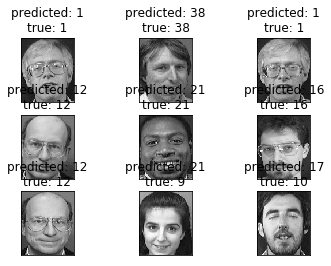

In [155]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=3):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        pred_name = y_pred[i]
        true_name = y_test[i]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)


#### Defining the model

In [156]:
model = Sequential()
model.add(Dense(512,input_shape=(XTr_pca.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [157]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               31232     
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 40)                20520     
__________

In [158]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[metrics.mae,metrics.categorical_accuracy])

#### Training

In [159]:
model.fit(XTr_pca, Y_train, batch_size=64, epochs=50, verbose=1, validation_data=(XTs_pca, Y_test))

Train on 273 samples, validate on 117 samples
Epoch 1/50
273/273 [==============================] - 0s 2ms/step - loss: 3.7008 - mean_absolute_error: 0.0486 - categorical_accuracy: 0.0623 - val_loss: 3.3651 - val_mean_absolute_error: 0.0482 - val_categorical_accuracy: 0.2393
Epoch 2/50
273/273 [==============================] - 0s 147us/step - loss: 2.9785 - mean_absolute_error: 0.0471 - categorical_accuracy: 0.4725 - val_loss: 2.9804 - val_mean_absolute_error: 0.0472 - val_categorical_accuracy: 0.5983
Epoch 3/50
273/273 [==============================] - 0s 175us/step - loss: 2.3971 - mean_absolute_error: 0.0446 - categorical_accuracy: 0.7949 - val_loss: 2.4944 - val_mean_absolute_error: 0.0453 - val_categorical_accuracy: 0.8291
Epoch 4/50
273/273 [==============================] - 0s 149us/step - loss: 1.7041 - mean_absolute_error: 0.0389 - categorical_accuracy: 0.9414 - val_loss: 1.9443 - val_mean_absolute_error: 0.0413 - val_categorical_accuracy: 0.8889
Epoch 5/50
273/273 [========

Epoch 36/50
273/273 [==============================] - 0s 147us/step - loss: 0.0046 - mean_absolute_error: 2.2801e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1604 - val_mean_absolute_error: 0.0055 - val_categorical_accuracy: 0.9573
Epoch 37/50
273/273 [==============================] - 0s 171us/step - loss: 0.0041 - mean_absolute_error: 2.0278e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1580 - val_mean_absolute_error: 0.0054 - val_categorical_accuracy: 0.9573
Epoch 38/50
273/273 [==============================] - 0s 144us/step - loss: 0.0044 - mean_absolute_error: 2.1887e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1563 - val_mean_absolute_error: 0.0054 - val_categorical_accuracy: 0.9573
Epoch 39/50
273/273 [==============================] - 0s 144us/step - loss: 0.0046 - mean_absolute_error: 2.2785e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1556 - val_mean_absolute_error: 0.0053 - val_categorical_accuracy: 0.9573
Epoch 40/50
273/273 [==============================]

#### Evaluating the performance

In [160]:
loss, mean_absolute_error, accuracy = model.evaluate(XTs_pca,Y_test, verbose=0)

In [161]:
print("Loss:", loss)
print("Categorical Accuracy: ", accuracy)
print("Mean absolute error: ", mean_absolute_error)

('Loss:', 0.14841065928339958)
('Categorical Accuracy: ', 0.95726495726495731)
('Mean absolute error: ', 0.0049515402732560271)


In [162]:
predicted_classes = model.predict_classes(XTs_pca)

In [163]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [164]:
correct_classified_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  85,  86,  87,  88,  89,  90,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116])

In [165]:
incorrect_classified_indices

array([11, 46, 56, 84, 91])

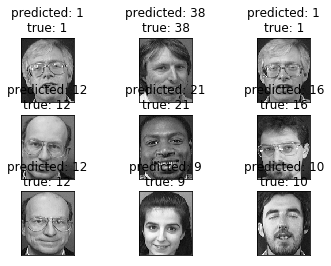

In [166]:
prediction_titles = list(titles(predicted_classes, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)

